In [ ]:
# Based on the Datacamp tutirial : https://www.datacamp.com/tutorial/svm-classification-scikit-learn-python
# Modified by Mehdi Ammi, Univ. Paris 8

# Scikit-Learn: Support Vector Machines (SVM)

## Introduction

In this notebook, you'll learn about Support Vector Machines, one of the most popular and widely used supervised machine learning algorithms.

SVM offers very high accuracy compared to other classifiers such as logistic regression, and decision trees. It is known for its kernel trick to handle nonlinear input spaces. It is used in a variety of applications such as face detection, intrusion detection, classification of emails, news articles and web pages, classification of genes, and handwriting recognition.

Generally, Support Vector Machines is considered to be a classification approach, it but can be employed in both types of classification and regression problems. It can easily handle multiple continuous and categorical variables. SVM constructs a hyperplane in multidimensional space to separate different classes. SVM generates optimal hyperplane in an iterative manner, which is used to minimize an error. The core idea of SVM is to find a maximum marginal hyperplane(MMH) that best divides the dataset into classes.

![SVM.png](attachment:edbccaac-af32-444c-9fc5-08245135f30e.png)


 - Support Vectors : Support vectors are the data points, which are closest to the hyperplane. These points will define the separating line better by calculating margins. These points are more relevant to the construction of the classifier.

 - Hyperplane : A hyperplane is a decision plane which separates between a set of objects having different class memberships.

 - Margin : A margin is a gap between the two lines on the closest class points. This is calculated as the perpendicular distance from the line to support vectors or closest points. If the margin is larger in between the classes, then it is considered a good margin, a smaller margin is a bad margin.

## How does SVM work?
The main objective is to segregate the given dataset in the best possible way. The distance between the either nearest points is known as the margin. The objective is to select a hyperplane with the maximum possible margin between support vectors in the given dataset. SVM searches for the maximum marginal hyperplane in the following steps:

1. Generate hyperplanes which segregates the classes in the best way. Left-hand side figure showing three hyperplanes black, blue and orange. Here, the blue and orange have higher classification error, but the black is separating the two classes correctly.

2. Select the right hyperplane with the maximum segregation from the either nearest data points as shown in the right-hand side figure.

![SVM_1.png](attachment:8fded9b0-a036-4e89-b091-8c6cab5e4a3a.png)

## Dealing with non-linear and inseparable planes
Some problems can’t be solved using linear hyperplane, as shown in the figure below (left-hand side).

In such situation, SVM uses a kernel trick to transform the input space to a higher dimensional space as shown on the right. The data points are plotted on the x-axis and z-axis (Z is the squared sum of both x and y: z=x^2=y^2). Now you can easily segregate these points using linear separation.

![SVM_2.png](attachment:ff35e35a-3c37-4476-8f76-353fb421e6d7.png)

## SVM Kernels

The SVM algorithm is implemented in practice using a kernel. A kernel transforms an input data space into the required form. SVM uses a technique called the kernel trick. Here, the kernel takes a low-dimensional input space and transforms it into a higher dimensional space. In other words, you can say that it converts nonseparable problem to separable problems by adding more dimension to it. It is most useful in non-linear separation problem. Kernel trick helps you to build a more accurate classifier.

 - Linear Kernel A linear kernel can be used as normal dot product any two given observations. The product between two vectors is the sum of the multiplication of each pair of input values.

    K(x,xi) = 1 + sum(x * xi)^d

 - Polynomial Kernel A polynomial kernel is a more generalized form of the linear kernel. The polynomial kernel can distinguish curved or nonlinear input space.

    K(x,xi) = 1 + sum(x * xi)^d

    Where d is the degree of the polynomial. d=1 is similar to the linear transformation. The degree needs to be manually specified in the learning algorithm.

 - Radial Basis Function Kernel The Radial basis function kernel is a popular kernel function commonly used in support vector machine classification. RBF can map an input space in infinite dimensional space.

    K(x,xi) = exp(-gamma * sum((x – xi^2))
    
    Here gamma is a parameter, which ranges from 0 to 1. A higher value of gamma will perfectly fit the training dataset, which causes over-fitting. Gamma=0.1 is considered to be a good default value. The value of gamma needs to be manually specified in the learning algorithm.
    
## Key Concepts:

- **Kernel Trick**: SVMs can efficiently perform a non-linear classification using what is called the kernel trick, implicitly mapping their inputs into high-dimensional feature spaces. Common kernels include polynomial, radial basis function (RBF), and sigmoid.
- **C Parameter**: This regularization parameter determines the trade-off between maximizing the margin and minimizing classification errors on the training data. A smaller C makes the margin larger but allows more misclassified data points.


## Advantages of SVM:
1. **Effective in High-Dimensional Spaces**: SVMs are particularly useful in applications with high-dimensional data, where the number of features is large compared to the number of data points.
2. **Memory Efficient**: Only a subset of training points (the support vectors) are used in the decision function, making SVM memory efficient.
3. **Versatility**: By using different kernel functions, SVMs can be adapted to a variety of data types and distributions.
4. **Robust to Overfitting**: Especially in high-dimensional space, SVMs are less prone to overfitting compared to other classifiers, especially when the number of dimensions exceeds the number of samples.

## Limitations of SVM:
1. **Computational Complexity**: Training an SVM can be computationally intensive, especially with large datasets. The complexity is between quadratic and cubic, making SVMs less suitable for very large datasets.
2. **Choice of Kernel**: The performance of an SVM classifier is highly dependent on the choice of the kernel and its parameters. Finding the right kernel and parameters can be challenging and often requires a lot of experimentation.
3. **Not Probabilistic**: SVM does not directly provide probability estimates, though methods like Platt scaling can be used to convert SVM outputs into probability scores.
4. **Scalability**: While SVMs perform well with smaller datasets, their training time becomes impractical with larger datasets due to their high computational cost.

## Classifier Building in Scikit-learn

Until now, you have learned about the theoretical background of SVM. Now you will learn about its implementation in Python using scikit-learn.

In the model the building part, you can use the cancer dataset, which is a very famous multi-class classification problem. This dataset is computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image.

The dataset comprises 30 features (mean radius, mean texture, mean perimeter, mean area, mean smoothness, mean compactness, mean concavity, mean concave points, mean symmetry, mean fractal dimension, radius error, texture error, perimeter error, area error, smoothness error, compactness error, concavity error, concave points error, symmetry error, fractal dimension error, worst radius, worst texture, worst perimeter, worst area, worst smoothness, worst compactness, worst concavity, worst concave points, worst symmetry, and worst fractal dimension) and a target (type of cancer).

This data has two types of cancer classes: malignant (harmful) and benign (not harmful). Here, you can build a model to classify the type of cancer. The dataset is available in the scikit-learn library or you can also download it from the UCI Machine Learning Library.

## Installing Scikit-Learn

In [1]:
!pip install scikit-learn

## Loading Data

Let's first load the required dataset you will use.

In [ ]:
# Import scikit-learn dataset library
from sklearn import datasets

# Load the breast cancer dataset
cancer = datasets.load_breast_cancer()

## Exploring Data

After you have loaded the dataset, you might want to know a little bit more about it. You can check feature and target names.

In [ ]:
# Print the names of the 13 features in the dataset
print("Features: ", cancer.feature_names)

# Print the label types of cancer ('malignant' and 'benign')
print("Labels: ", cancer.target_names)

In [ ]:
>>
Features:  ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Labels:  ['malignant' 'benign']

Let's explore it for a bit more. You can also check the shape of the dataset using shape.

In [ ]:
# print data(feature)shape
cancer.data.shape

In [ ]:
>>
(569, 30)

Let's check top 5 records of the feature set.

In [ ]:
# print the cancer data features (top 5 records)
print(cancer.data[0:5])

In [ ]:
>>
[[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
  1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
  6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
  1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
  4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 1.326e+03 8.474e-02 7.864e-02 8.690e-02
  7.017e-02 1.812e-01 5.667e-02 5.435e-01 7.339e-01 3.398e+00 7.408e+01
  5.225e-03 1.308e-02 1.860e-02 1.340e-02 1.389e-02 3.532e-03 2.499e+01
  2.341e+01 1.588e+02 1.956e+03 1.238e-01 1.866e-01 2.416e-01 1.860e-01
  2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 1.203e+03 1.096e-01 1.599e-01 1.974e-01
  1.279e-01 2.069e-01 5.999e-02 7.456e-01 7.869e-01 4.585e+00 9.403e+01
  6.150e-03 4.006e-02 3.832e-02 2.058e-02 2.250e-02 4.571e-03 2.357e+01
  2.553e+01 1.525e+02 1.709e+03 1.444e-01 4.245e-01 4.504e-01 2.430e-01
  3.613e-01 8.758e-02]
 [1.142e+01 2.038e+01 7.758e+01 3.861e+02 1.425e-01 2.839e-01 2.414e-01
  1.052e-01 2.597e-01 9.744e-02 4.956e-01 1.156e+00 3.445e+00 2.723e+01
  9.110e-03 7.458e-02 5.661e-02 1.867e-02 5.963e-02 9.208e-03 1.491e+01
  2.650e+01 9.887e+01 5.677e+02 2.098e-01 8.663e-01 6.869e-01 2.575e-01
  6.638e-01 1.730e-01]
 [2.029e+01 1.434e+01 1.351e+02 1.297e+03 1.003e-01 1.328e-01 1.980e-01
  1.043e-01 1.809e-01 5.883e-02 7.572e-01 7.813e-01 5.438e+00 9.444e+01
  1.149e-02 2.461e-02 5.688e-02 1.885e-02 1.756e-02 5.115e-03 2.254e+01
  1.667e+01 1.522e+02 1.575e+03 1.374e-01 2.050e-01 4.000e-01 1.625e-01
  2.364e-01 7.678e-02]]

Let's take a look at the target set.

In [ ]:
# print the cancer labels (0:malignant, 1:benign)
print(cancer.target)

In [ ]:
>>
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 1 1 1 1 1 0 0 1 0 1 0 1 1 1 1 1 0 1 1 0 1 0 1 0 0
 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 0 0 0 0 1]

## Splitting Data

To understand model performance, dividing the dataset into a training set and a test set is a good strategy.

Split the dataset by using the function train_test_split(). you need to pass 3 parameters features, target, and test_set size. Additionally, you can use random_state to select records randomly.

In [ ]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.3,random_state=109) # 70% training and 30% test

## Generating Model

Let's build support vector machine model. First, import the SVM module and create support vector classifier object by passing argument kernel as the linear kernel in SVC() function.

Then, fit your model on train set using fit() and perform prediction on the test set using predict().

In [ ]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

## Evaluating the Model

Let's estimate how accurately the classifier or model can predict the breast cancer of patients.

Accuracy can be computed by comparing actual test set values and predicted values.

In [ ]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

In [ ]:
>>
Accuracy: 0.9649122807017544

Well, you got a classification rate of 96.49%, considered as very good accuracy.

For further evaluation, you can also check precision and recall of model.

In [ ]:
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))

In [ ]:
>>
Precision: 0.9811320754716981
Recall: 0.9629629629629629

Well, you got a precision of 98% and recall of 96%, which are considered as very good values.

## Tuning Hyperparameters

 - Kernel: The main function of the kernel is to transform the given dataset input data into the required form. There are various types of functions such as linear, polynomial, and radial basis function (RBF). Polynomial and RBF are useful for non-linear hyperplane. Polynomial and RBF kernels compute the separation line in the higher dimension. In some of the applications, it is suggested to use a more complex kernel to separate the classes that are curved or nonlinear. This transformation can lead to more accurate classifiers.
 - Regularization: Regularization parameter in python's Scikit-learn C parameter used to maintain regularization. Here C is the penalty parameter, which represents misclassification or error term. The misclassification or error term tells the SVM optimization how much error is bearable. This is how you can control the trade-off between decision boundary and misclassification term. A smaller value of C creates a small-margin hyperplane and a larger value of C creates a larger-margin hyperplane.
 - Gamma: A lower value of Gamma will loosely fit the training dataset, whereas a higher value of gamma will exactly fit the training dataset, which causes over-fitting. In other words, you can say a low value of gamma considers only nearby points in calculating the separation line, while the a value of gamma considers all the data points in the calculation of the separation line.

## Exercises

### Exercise 1: Experimenting with Different Kernels

1. **Polynomial Kernel**: Modify the code to use a polynomial kernel (`kernel='poly'`) and observe the changes in accuracy, precision, and recall.
2. **RBF Kernel**: Modify the code to use an RBF kernel (`kernel='rbf'`) and observe the changes in accuracy, precision, and recall.
3. **Sigmoid Kernel**: Modify the code to use a sigmoid kernel (`kernel='sigmoid'`) and observe the changes in accuracy, precision, and recall.


In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Load your dataset
data = pd.read_csv('fraudulent_transactions.csv')
X = data.drop('fraud', axis=1)
y = data['fraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Polynomial Kernel
svm_poly = SVC(kernel='poly')
svm_poly.fit(X_train, y_train)
y_pred_poly = svm_poly.predict(X_test)

accuracy_poly = accuracy_score(y_test, y_pred_poly)
precision_poly = precision_score(y_test, y_pred_poly, average='weighted')
recall_poly = recall_score(y_test, y_pred_poly, average='weighted')

print("Polynomial Kernel:")
print(f"Accuracy: {accuracy_poly:.2f}, Precision: {precision_poly:.2f}, Recall: {recall_poly:.2f}")

# RBF Kernel
svm_rbf = SVC(kernel='rbf')
svm_rbf.fit(X_train, y_train)
y_pred_rbf = svm_rbf.predict(X_test)

accuracy_rbf = accuracy_score(y_test, y_pred_rbf)
precision_rbf = precision_score(y_test, y_pred_rbf, average='weighted')
recall_rbf = recall_score(y_test, y_pred_rbf, average='weighted')

print("\nRBF Kernel:")
print(f"Accuracy: {accuracy_rbf:.2f}, Precision: {precision_rbf:.2f}, Recall: {recall_rbf:.2f}")

# Sigmoid Kernel
svm_sigmoid = SVC(kernel='sigmoid')
svm_sigmoid.fit(X_train, y_train)
y_pred_sigmoid = svm_sigmoid.predict(X_test)

accuracy_sigmoid = accuracy_score(y_test, y_pred_sigmoid)
precision_sigmoid = precision_score(y_test, y_pred_sigmoid, average='weighted')
recall_sigmoid = recall_score(y_test, y_pred_sigmoid, average='weighted')

print("\nSigmoid Kernel:")
print(f"Accuracy: {accuracy_sigmoid:.2f}, Precision: {precision_sigmoid:.2f}, Recall: {recall_sigmoid:.2f}")


Polynomial Kernel:
Accuracy: 1.00, Precision: 1.00, Recall: 1.00

RBF Kernel:
Accuracy: 1.00, Precision: 1.00, Recall: 1.00

Sigmoid Kernel:
Accuracy: 0.50, Precision: 0.50, Recall: 0.50


### Exercise 2: Tuning the C Parameter

1. **Low C Value**: Modify the code to set a low value for the `C` parameter (e.g., `C=0.1`) and observe how it affects the model's accuracy, precision, and recall.
2. **High C Value**: Modify the code to set a high value for the `C` parameter (e.g., `C=1000`) and observe how it affects the model's accuracy, precision, and recall.
3. **Intermediate C Value**: Modify the code to set an intermediate value for the `C` parameter (e.g., `C=1`) and observe how it affects the model's accuracy, precision, and recall.


In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Load your dataset
data = pd.read_csv('fraudulent_transactions.csv')
X = data.drop('fraud', axis=1)
y = data['fraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Low C Value
svm_low_c = SVC(C=0.1)
svm_low_c.fit(X_train, y_train)
y_pred_low_c = svm_low_c.predict(X_test)

accuracy_low_c = accuracy_score(y_test, y_pred_low_c)
precision_low_c = precision_score(y_test, y_pred_low_c, average='weighted')
recall_low_c = recall_score(y_test, y_pred_low_c, average='weighted')

print("Low C Value (C=0.1):")
print(f"Accuracy: {accuracy_low_c:.2f}, Precision: {precision_low_c:.2f}, Recall: {recall_low_c:.2f}")

# High C Value
svm_high_c = SVC(C=1000)
svm_high_c.fit(X_train, y_train)
y_pred_high_c = svm_high_c.predict(X_test)

accuracy_high_c = accuracy_score(y_test, y_pred_high_c)
precision_high_c = precision_score(y_test, y_pred_high_c, average='weighted')
recall_high_c = recall_score(y_test, y_pred_high_c, average='weighted')

print("\nHigh C Value (C=1000):")
print(f"Accuracy: {accuracy_high_c:.2f}, Precision: {precision_high_c:.2f}, Recall: {recall_high_c:.2f}")

# Intermediate C Value
svm_intermediate_c = SVC(C=1)
svm_intermediate_c.fit(X_train, y_train)
y_pred_intermediate_c = svm_intermediate_c.predict(X_test)

accuracy_intermediate_c = accuracy_score(y_test, y_pred_intermediate_c)
precision_intermediate_c = precision_score(y_test, y_pred_intermediate_c, average='weighted')
recall_intermediate_c = recall_score(y_test, y_pred_intermediate_c, average='weighted')

print("\nIntermediate C Value (C=1):")
print(f"Accuracy: {accuracy_intermediate_c:.2f}, Precision: {precision_intermediate_c:.2f}, Recall: {recall_intermediate_c:.2f}")


Low C Value (C=0.1):
Accuracy: 0.75, Precision: 0.56, Recall: 0.75

High C Value (C=1000):
Accuracy: 0.88, Precision: 0.89, Recall: 0.88

Intermediate C Value (C=1):
Accuracy: 1.00, Precision: 1.00, Recall: 1.00


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### Exercise 3: Tuning the Gamma Parameter

1. **Low Gamma Value**: Modify the code to set a low value for the `gamma` parameter (e.g., `gamma=0.01`) when using the RBF kernel and observe how it affects the model's accuracy, precision, and recall.
2. **High Gamma Value**: Modify the code to set a high value for the `gamma` parameter (e.g., `gamma=1`) when using the RBF kernel and observe how it affects the model's accuracy, precision, and recall.
3. **Default Gamma Value**: Modify the code to use the default value for the `gamma` parameter (`gamma='scale'`) when using the RBF kernel and observe how it affects the model's accuracy, precision, and recall.

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Charger le dataset
data = pd.read_csv('fraudulent_transactions.csv')
X = data.drop('fraud', axis=1)  # Suppression de la colonne cible
y = data['fraud']  # Colonne cible

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Valeur faible de gamma
svm_low_gamma = SVC(kernel='rbf', gamma=0.01)
svm_low_gamma.fit(X_train, y_train)
y_pred_low_gamma = svm_low_gamma.predict(X_test)

accuracy_low_gamma = accuracy_score(y_test, y_pred_low_gamma)
precision_low_gamma = precision_score(y_test, y_pred_low_gamma, average='weighted')
recall_low_gamma = recall_score(y_test, y_pred_low_gamma, average='weighted')

print("Low Gamma Value (gamma=0.01):")
print(f"Accuracy: {accuracy_low_gamma:.2f}, Precision: {precision_low_gamma:.2f}, Recall: {recall_low_gamma:.2f}")

# Valeur élevée de gamma
svm_high_gamma = SVC(kernel='rbf', gamma=1)
svm_high_gamma.fit(X_train, y_train)
y_pred_high_gamma = svm_high_gamma.predict(X_test)

accuracy_high_gamma = accuracy_score(y_test, y_pred_high_gamma)
precision_high_gamma = precision_score(y_test, y_pred_high_gamma, average='weighted')
recall_high_gamma = recall_score(y_test, y_pred_high_gamma, average='weighted')

print("\nHigh Gamma Value (gamma=1):")
print(f"Accuracy: {accuracy_high_gamma:.2f}, Precision: {precision_high_gamma:.2f}, Recall: {recall_high_gamma:.2f}")

# Valeur par défaut de gamma
svm_default_gamma = SVC(kernel='rbf', gamma='scale')
svm_default_gamma.fit(X_train, y_train)
y_pred_default_gamma = svm_default_gamma.predict(X_test)

accuracy_default_gamma = accuracy_score(y_test, y_pred_default_gamma)
precision_default_gamma = precision_score(y_test, y_pred_default_gamma, average='weighted')
recall_default_gamma = recall_score(y_test, y_pred_default_gamma, average='weighted')

print("\nDefault Gamma Value (gamma='scale'):")
print(f"Accuracy: {accuracy_default_gamma:.2f}, Precision: {precision_default_gamma:.2f}, Recall: {recall_default_gamma:.2f}")


Low Gamma Value (gamma=0.01):
Accuracy: 1.00, Precision: 1.00, Recall: 1.00

High Gamma Value (gamma=1):
Accuracy: 0.88, Precision: 0.89, Recall: 0.88

Default Gamma Value (gamma='scale'):
Accuracy: 1.00, Precision: 1.00, Recall: 1.00


### Exercise 4: Combining Parameter Changes

1. **Combination 1**: Modify the code to use a polynomial kernel with `degree=3` and `C=1`. Observe the changes in accuracy, precision, and recall.
2. **Combination 2**: Modify the code to use an RBF kernel with `gamma=0.1` and `C=10`. Observe the changes in accuracy, precision, and recall.
3. **Combination 3**: Modify the code to use a sigmoid kernel with `C=0.5` and `gamma=0.5`. Observe the changes in accuracy, precision, and recall.

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Charger le dataset
data = pd.read_csv('fraudulent_transactions.csv')
X = data.drop('fraud', axis=1)  # Suppression de la colonne cible
y = data['fraud']  # Colonne cible

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Combination 1: Polynomial Kernel with degree=3 and C=1
svm_poly = SVC(kernel='poly', degree=3, C=1)
svm_poly.fit(X_train, y_train)
y_pred_poly = svm_poly.predict(X_test)

accuracy_poly = accuracy_score(y_test, y_pred_poly)
precision_poly = precision_score(y_test, y_pred_poly, average='weighted')
recall_poly = recall_score(y_test, y_pred_poly, average='weighted')

print("Combination 1 (Polynomial Kernel, degree=3, C=1):")
print(f"Accuracy: {accuracy_poly:.2f}, Precision: {precision_poly:.2f}, Recall: {recall_poly:.2f}")

# Combination 2: RBF Kernel with gamma=0.1 and C=10
svm_rbf = SVC(kernel='rbf', gamma=0.1, C=10)
svm_rbf.fit(X_train, y_train)
y_pred_rbf = svm_rbf.predict(X_test)

accuracy_rbf = accuracy_score(y_test, y_pred_rbf)
precision_rbf = precision_score(y_test, y_pred_rbf, average='weighted')
recall_rbf = recall_score(y_test, y_pred_rbf, average='weighted')

print("\nCombination 2 (RBF Kernel, gamma=0.1, C=10):")
print(f"Accuracy: {accuracy_rbf:.2f}, Precision: {precision_rbf:.2f}, Recall: {recall_rbf:.2f}")

# Combination 3: Sigmoid Kernel with C=0.5 and gamma=0.5
svm_sigmoid = SVC(kernel='sigmoid', C=0.5, gamma=0.5)
svm_sigmoid.fit(X_train, y_train)
y_pred_sigmoid = svm_sigmoid.predict(X_test)

accuracy_sigmoid = accuracy_score(y_test, y_pred_sigmoid)
precision_sigmoid = precision_score(y_test, y_pred_sigmoid, average='weighted')
recall_sigmoid = recall_score(y_test, y_pred_sigmoid, average='weighted')

print("\nCombination 3 (Sigmoid Kernel, C=0.5, gamma=0.5):")
print(f"Accuracy: {accuracy_sigmoid:.2f}, Precision: {precision_sigmoid:.2f}, Recall: {recall_sigmoid:.2f}")


Combination 1 (Polynomial Kernel, degree=3, C=1):
Accuracy: 1.00, Precision: 1.00, Recall: 1.00

Combination 2 (RBF Kernel, gamma=0.1, C=10):
Accuracy: 0.88, Precision: 0.89, Recall: 0.88

Combination 3 (Sigmoid Kernel, C=0.5, gamma=0.5):
Accuracy: 0.75, Precision: 0.56, Recall: 0.75


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### Exercise 5: Cross-Validation

1. **Cross-Validation with Linear Kernel**: Modify the code to use cross-validation with a linear kernel and observe the changes in the model's performance metrics.
2. **Cross-Validation with RBF Kernel**: Modify the code to use cross-validation with an RBF kernel and different values of `gamma` and `C`. Observe the changes in the model's performance metrics.
3. **Cross-Validation with Polynomial Kernel**: Modify the code to use cross-validation with a polynomial kernel and different values of `degree` and `C`. Observe the changes in the model's performance metrics.

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score

# Charger le dataset
data = pd.read_csv('fraudulent_transactions.csv')
X = data.drop('fraud', axis=1)  # Suppression de la colonne cible
y = data['fraud']  # Colonne cible

# Cross-Validation with Linear Kernel
svm_linear = SVC(kernel='linear', C=1)
scores_linear = cross_val_score(svm_linear, X, y, cv=5, scoring='accuracy')

print("Cross-Validation with Linear Kernel:")
print(f"Accuracy: {scores_linear.mean():.2f} ± {scores_linear.std():.2f}")

# Cross-Validation with RBF Kernel
gamma_values = [0.01, 0.1, 1]
C_values = [1, 10]

for gamma in gamma_values:
    for C in C_values:
        svm_rbf = SVC(kernel='rbf', gamma=gamma, C=C)
        scores_rbf = cross_val_score(svm_rbf, X, y, cv=5, scoring='accuracy')
        print(f"\nCross-Validation with RBF Kernel (gamma={gamma}, C={C}):")
        print(f"Accuracy: {scores_rbf.mean():.2f} ± {scores_rbf.std():.2f}")

# Cross-Validation with Polynomial Kernel
degree_values = [2, 3]
C_values_poly = [1, 10]

for degree in degree_values:
    for C in C_values_poly:
        svm_poly = SVC(kernel='poly', degree=degree, C=C)
        scores_poly = cross_val_score(svm_poly, X, y, cv=5, scoring='accuracy')
        print(f"\nCross-Validation with Polynomial Kernel (degree={degree}, C={C}):")
        print(f"Accuracy: {scores_poly.mean():.2f} ± {scores_poly.std():.2f}")


Cross-Validation with Linear Kernel:
Accuracy: 0.95 ± 0.10

Cross-Validation with RBF Kernel (gamma=0.01, C=1):
Accuracy: 0.95 ± 0.10

Cross-Validation with RBF Kernel (gamma=0.01, C=10):
Accuracy: 0.95 ± 0.10

Cross-Validation with RBF Kernel (gamma=0.1, C=1):
Accuracy: 0.95 ± 0.10

Cross-Validation with RBF Kernel (gamma=0.1, C=10):
Accuracy: 0.95 ± 0.10

Cross-Validation with RBF Kernel (gamma=1, C=1):
Accuracy: 0.93 ± 0.10

Cross-Validation with RBF Kernel (gamma=1, C=10):
Accuracy: 0.93 ± 0.10

Cross-Validation with Polynomial Kernel (degree=2, C=1):
Accuracy: 0.95 ± 0.10

Cross-Validation with Polynomial Kernel (degree=2, C=10):
Accuracy: 0.95 ± 0.10

Cross-Validation with Polynomial Kernel (degree=3, C=1):
Accuracy: 0.95 ± 0.10

Cross-Validation with Polynomial Kernel (degree=3, C=10):
Accuracy: 0.95 ± 0.10


### Exercise 6: Feature Scaling

1. **Without Scaling**: Observe the SVM model performance without scaling the features.
2. **With Standard Scaling**: Use `StandardScaler` from `sklearn.preprocessing` to scale the features and observe the changes in model performance.
3. **With MinMax Scaling**: Use `MinMaxScaler` from `sklearn.preprocessing` to scale the features and observe the changes in model performance.

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Charger le dataset
data = pd.read_csv('fraudulent_transactions.csv')
X = data.drop('fraud', axis=1)  # Suppression de la colonne cible
y = data['fraud']  # Colonne cible

# 1. Without Scaling
svm_no_scaling = SVC(kernel='rbf', gamma=0.1, C=10)
scores_no_scaling = cross_val_score(svm_no_scaling, X, y, cv=5, scoring='accuracy')
print("Without Scaling:")
print(f"Accuracy: {scores_no_scaling.mean():.2f} ± {scores_no_scaling.std():.2f}")

# 2. With Standard Scaling
scaler_standard = StandardScaler()
X_standard_scaled = scaler_standard.fit_transform(X)

svm_standard_scaling = SVC(kernel='rbf', gamma=0.1, C=10)
scores_standard_scaling = cross_val_score(svm_standard_scaling, X_standard_scaled, y, cv=5, scoring='accuracy')
print("\nWith Standard Scaling:")
print(f"Accuracy: {scores_standard_scaling.mean():.2f} ± {scores_standard_scaling.std():.2f}")

# 3. With MinMax Scaling
scaler_minmax = MinMaxScaler()
X_minmax_scaled = scaler_minmax.fit_transform(X)

svm_minmax_scaling = SVC(kernel='rbf', gamma=0.1, C=10)
scores_minmax_scaling = cross_val_score(svm_minmax_scaling, X_minmax_scaled, y, cv=5, scoring='accuracy')
print("\nWith MinMax Scaling:")
print(f"Accuracy: {scores_minmax_scaling.mean():.2f} ± {scores_minmax_scaling.std():.2f}")


Without Scaling:
Accuracy: 0.95 ± 0.10

With Standard Scaling:
Accuracy: 0.97 ± 0.05

With MinMax Scaling:
Accuracy: 0.95 ± 0.07


### Exercise 7: Handling Imbalanced Data

1. **Class Weights Adjustment**: Modify the `class_weight` parameter to handle imbalanced data and observe the changes in model performance.
2. **SMOTE (Synthetic Minority Over-sampling Technique)**: Use the `SMOTE` technique to balance the dataset and observe the changes in model performance.

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Charger le dataset
data = pd.read_csv('fraudulent_transactions.csv')
X = data.drop('fraud', axis=1)  # Suppression de la colonne cible
y = data['fraud']  # Colonne cible

# Cross-Validation with Class Weights Adjustment
svm_class_weight = SVC(kernel='rbf', gamma=0.1, C=10, class_weight='balanced')
scores_class_weight = cross_val_score(svm_class_weight, X, y, cv=5, scoring='accuracy')

print("Class Weights Adjustment:")
print(f"Accuracy: {scores_class_weight.mean():.2f} ± {scores_class_weight.std():.2f}")



Class Weights Adjustment:
Accuracy: 0.95 ± 0.10


In [17]:
from imblearn.over_sampling import SMOTE

# Appliquer SMOTE pour équilibrer le dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Cross-Validation with SMOTE
svm_smote = SVC(kernel='rbf', gamma=0.1, C=10)
scores_smote = cross_val_score(svm_smote, X_resampled, y_resampled, cv=5, scoring='accuracy')

print("\nSMOTE Technique:")
print(f"Accuracy: {scores_smote.mean():.2f} ± {scores_smote.std():.2f}")



SMOTE Technique:
Accuracy: 0.96 ± 0.08


### Exercise 8: Learning Curves

1. **Plot Learning Curves**: Modify the code to plot learning curves to visualize the training and validation scores.
2. **Analyze Overfitting and Underfitting**: Use the learning curves to analyze if the model is overfitting or underfitting.

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
5 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 199, in fit
    y = self._validate_targets(y)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/sv

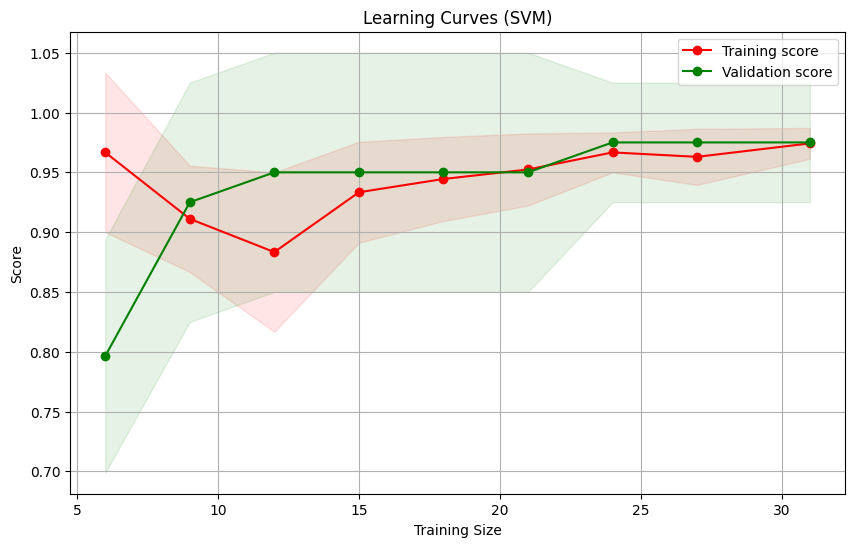

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

# Charger le dataset
data = pd.read_csv('fraudulent_transactions.csv')
X = data.drop('fraud', axis=1)  # Suppression de la colonne cible
y = data['fraud']  # Colonne cible

# Mise à l'échelle des caractéristiques
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Définir le modèle SVM
svm_model = SVC(kernel='rbf', gamma=0.1, C=10)

# Tracer les courbes d'apprentissage
train_sizes, train_scores, test_scores = learning_curve(svm_model, X_scaled, y, cv=5, n_jobs=-1,
                                                          train_sizes=np.linspace(0.1, 1.0, 10))

# Calculer les moyennes et les écarts types
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Tracer les courbes
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Validation score')

# Tracer les intervalles de confiance
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std,
                 color='r', alpha=0.1)
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std,
                 color='g', alpha=0.1)

plt.title('Learning Curves (SVM)')
plt.xlabel('Training Size')
plt.ylabel('Score')
plt.legend(loc='best')
plt.grid()
plt.show()


### Exercise 9: Grid Search for Hyperparameter Tuning

1. **Grid Search with Linear Kernel**: Use `GridSearchCV` to find the best parameters for an SVM with a linear kernel.
2. **Grid Search with RBF Kernel**: Use `GridSearchCV` to find the best parameters for an SVM with an RBF kernel.
3. **Grid Search with Polynomial Kernel**: Use `GridSearchCV` to find the best parameters for an SVM with a polynomial kernel.

In [19]:
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Charger le dataset
data = pd.read_csv('fraudulent_transactions.csv')
X = data.drop('fraud', axis=1)  # Suppression de la colonne cible
y = data['fraud']  # Colonne cible

# Définir le modèle SVM avec un noyau linéaire
svm_linear = SVC(kernel='linear')

# Définir les paramètres à tester
param_grid_linear = {
    'C': [0.1, 1, 10, 100],
    'class_weight': [None, 'balanced']
}

# Grid Search
grid_search_linear = GridSearchCV(svm_linear, param_grid_linear, cv=5, scoring='accuracy')
grid_search_linear.fit(X, y)

print("Best parameters for Linear Kernel:")
print(grid_search_linear.best_params_)
print(f"Best cross-validation accuracy: {grid_search_linear.best_score_:.2f}")


Best parameters for Linear Kernel:
{'C': 0.1, 'class_weight': None}
Best cross-validation accuracy: 0.95


In [20]:
# Définir le modèle SVM avec un noyau RBF
svm_rbf = SVC(kernel='rbf')

# Définir les paramètres à tester
param_grid_rbf = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.01, 0.1, 1, 10],
    'class_weight': [None, 'balanced']
}

# Grid Search
grid_search_rbf = GridSearchCV(svm_rbf, param_grid_rbf, cv=5, scoring='accuracy')
grid_search_rbf.fit(X, y)

print("\nBest parameters for RBF Kernel:")
print(grid_search_rbf.best_params_)
print(f"Best cross-validation accuracy: {grid_search_rbf.best_score_:.2f}")



Best parameters for RBF Kernel:
{'C': 0.1, 'class_weight': 'balanced', 'gamma': 0.1}
Best cross-validation accuracy: 0.95


In [21]:
# Définir le modèle SVM avec un noyau polynomial
svm_poly = SVC(kernel='poly')

# Définir les paramètres à tester
param_grid_poly = {
    'C': [0.1, 1, 10, 100],
    'degree': [2, 3, 4],
    'class_weight': [None, 'balanced']
}

# Grid Search
grid_search_poly = GridSearchCV(svm_poly, param_grid_poly, cv=5, scoring='accuracy')
grid_search_poly.fit(X, y)

print("\nBest parameters for Polynomial Kernel:")
print(grid_search_poly.best_params_)
print(f"Best cross-validation accuracy: {grid_search_poly.best_score_:.2f}")



Best parameters for Polynomial Kernel:
{'C': 1, 'class_weight': None, 'degree': 2}
Best cross-validation accuracy: 0.95


### Exercise 10: SVM for Regression

1. **SVR (Support Vector Regression)**: Modify the code to use SVR for a regression problem and observe the model's performance.
2. **Tuning SVR Parameters**: Experiment with different parameters for SVR and observe the changes in model performance.

SVR Model Performance:
Mean Squared Error: 3.84
R^2 Score: 0.93


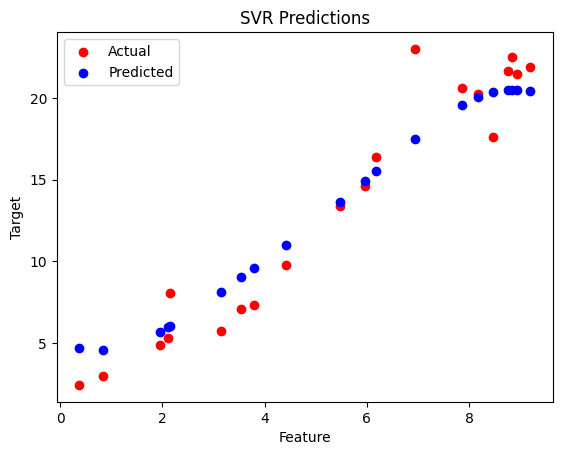

In [22]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Générer un dataset synthétique pour la régression
X = np.random.rand(100, 1) * 10  # 100 échantillons, 1 caractéristique
y = 2.5 * X.flatten() + np.random.randn(100) * 2  # Relation linéaire avec bruit

# Diviser le dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Utiliser SVR
svr_model = SVR(kernel='rbf', C=1.0, gamma='scale')
svr_model.fit(X_train, y_train)

# Prédictions
y_pred = svr_model.predict(X_test)

# Évaluer le modèle
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("SVR Model Performance:")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")

# Tracer les résultats
plt.scatter(X_test, y_test, color='red', label='Actual')
plt.scatter(X_test, y_pred, color='blue', label='Predicted')
plt.title('SVR Predictions')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()
plt.show()


In [25]:
from sklearn.model_selection import GridSearchCV

# Définir le modèle SVR
svr = SVR()

# Définir les paramètres à tester
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.01, 0.1, 1],
    'kernel': ['linear', 'rbf', 'poly']
}

# Grid Search
grid_search = GridSearchCV(svr, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

print("\nBest parameters for SVR:")
print(grid_search.best_params_)
print(f"Best cross-validation MSE: {-grid_search.best_score_:.2f}")

# Évaluer le meilleur modèle
best_svr = grid_search.best_estimator_
y_pred_best = best_svr.predict(X_test)

mse_best = mean_squared_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)

print(f"Best SVR Model Performance:")
print(f"Mean Squared Error: {mse_best:.2f}")
print(f"R^2 Score: {r2_best:.2f}")



Best parameters for SVR:
{'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}
Best cross-validation MSE: 0.04
Best SVR Model Performance:
Mean Squared Error: 0.03
R^2 Score: 0.96


### Exercise 11: SVM Classification on the "Iris" Dataset
Perform SVM classification on the famous Iris dataset to classify the species of iris flowers. Experiment with different kernels and parameters to optimize the model's performance.

Instructions:

1. **Load the Iris Dataset**: Use the `load_iris()` function from `sklearn.datasets` to load the Iris dataset.
2. **Experiment with Different Kernels**: Modify the code to use polynomial (`kernel='poly'`), RBF (`kernel='rbf'`), and sigmoid (`kernel='sigmoid'`) kernels. Observe the changes in accuracy, precision, and recall.
3. **Tune the C Parameter**: Experiment with different values of the `C` parameter (e.g., `C=0.1`, `C=1`, `C=1000`). Observe how it affects the model's performance.
4. **Tune the Gamma Parameter**: For the RBF kernel, experiment with different values of the `gamma` parameter (e.g., `gamma=0.01`, `gamma=0.1`, `gamma=1`). Observe how it affects the model's performance.


In [24]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Charger le dataset Iris
iris = load_iris()
X = iris.data
y = iris.target

# Diviser le dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [26]:
# SVM avec noyau polynomial
svm_poly = SVC(kernel='poly', C=1)
svm_poly.fit(X_train, y_train)
y_pred_poly = svm_poly.predict(X_test)

print("Polynomial Kernel:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_poly):.2f}")
print(f"Precision: {precision_score(y_test, y_pred_poly, average='weighted'):.2f}")
print(f"Recall: {recall_score(y_test, y_pred_poly, average='weighted'):.2f}")


Polynomial Kernel:
Accuracy: 1.00
Precision: 1.00
Recall: 1.00


In [ ]:
# SVM avec noyau RBF
svm_rbf = SVC(kernel='rbf', C=1)
svm_rbf.fit(X_train, y_train)
y_pred_rbf = svm_rbf.predict(X_test)

print("\nRBF Kernel:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rbf):.2f}")
print(f"Precision: {precision_score(y_test, y_pred_rbf, average='weighted'):.2f}")
print(f"Recall: {recall_score(y_test, y_pred_rbf, average='weighted'):.2f}")


In [ ]:
# SVM avec noyau sigmoïde
svm_sigmoid = SVC(kernel='sigmoid', C=1)
svm_sigmoid.fit(X_train, y_train)
y_pred_sigmoid = svm_sigmoid.predict(X_test)

print("\nSigmoid Kernel:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_sigmoid):.2f}")
print(f"Precision: {precision_score(y_test, y_pred_sigmoid, average='weighted'):.2f}")
print(f"Recall: {recall_score(y_test, y_pred_sigmoid, average='weighted'):.2f}")


In [ ]:
C_values = [0.1, 1, 1000]

for C in C_values:
    svm_rbf_c = SVC(kernel='rbf', C=C)
    svm_rbf_c.fit(X_train, y_train)
    y_pred_rbf_c = svm_rbf_c.predict(X_test)

    print(f"\nRBF Kernel with C={C}:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred_rbf_c):.2f}")
    print(f"Precision: {precision_score(y_test, y_pred_rbf_c, average='weighted'):.2f}")
    print(f"Recall: {recall_score(y_test, y_pred_rbf_c, average='weighted'):.2f}")


In [ ]:
gamma_values = [0.01, 0.1, 1]

for gamma in gamma_values:
    svm_rbf_gamma = SVC(kernel='rbf', C=1, gamma=gamma)
    svm_rbf_gamma.fit(X_train, y_train)
    y_pred_rbf_gamma = svm_rbf_gamma.predict(X_test)

    print(f"\nRBF Kernel with gamma={gamma}:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred_rbf_gamma):.2f}")
    print(f"Precision: {precision_score(y_test, y_pred_rbf_gamma, average='weighted'):.2f}")
    print(f"Recall: {recall_score(y_test, y_pred_rbf_gamma, average='weighted'):.2f}")


### Exercise 12: SVR on the "Boston Housing" Dataset
Perform Support Vector Regression (SVR) on the Boston Housing dataset to predict housing prices. Experiment with different kernels and parameters to optimize the model's performance.

Instructions:

1. **Load the Boston Housing Dataset**: Use the `load_boston()` function from `sklearn.datasets` to load the Boston Housing dataset.
2. **SVR with Different Kernels**: Modify the code to use SVR with linear (`kernel='linear'`), polynomial (`kernel='poly'`), and RBF (`kernel='rbf'`) kernels. Observe the changes in mean squared error and R^2 score.
3. **Tune the C Parameter**: Experiment with different values of the `C` parameter (e.g., `C=0.1`, `C=1`, `C=1000`). Observe how it affects the model's performance.
4. **Tune the Gamma Parameter**: For the RBF kernel, experiment with different values of the `gamma` parameter (e.g., `gamma=0.01`, `gamma=0.1`, `gamma=1`). Observe how it affects the model's performance.


In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# Charger le dataset Boston Housing
boston = load_boston()
X = boston.data
y = boston.target

# Diviser le dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# SVR avec noyau linéaire
svr_linear = SVR(kernel='linear')
svr_linear.fit(X_train, y_train)
y_pred_linear = svr_linear.predict(X_test)

mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print("Linear Kernel:")
print(f"Mean Squared Error: {mse_linear:.2f}")
print(f"R^2 Score: {r2_linear:.2f}")


In [ ]:
# SVR avec noyau polynomial
svr_poly = SVR(kernel='poly')
svr_poly.fit(X_train, y_train)
y_pred_poly = svr_poly.predict(X_test)

mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

print("\nPolynomial Kernel:")
print(f"Mean Squared Error: {mse_poly:.2f}")
print(f"R^2 Score: {r2_poly:.2f}")


In [ ]:
# SVR avec noyau RBF
svr_rbf = SVR(kernel='rbf')
svr_rbf.fit(X_train, y_train)
y_pred_rbf = svr_rbf.predict(X_test)

mse_rbf = mean_squared_error(y_test, y_pred_rbf)
r2_rbf = r2_score(y_test, y_pred_rbf)

print("\nRBF Kernel:")
print(f"Mean Squared Error: {mse_rbf:.2f}")
print(f"R^2 Score: {r2_rbf:.2f}")


In [ ]:
C_values = [0.1, 1, 1000]

for C in C_values:
    svr_rbf_c = SVR(kernel='rbf', C=C)
    svr_rbf_c.fit(X_train, y_train)
    y_pred_rbf_c = svr_rbf_c.predict(X_test)

    mse_rbf_c = mean_squared_error(y_test, y_pred_rbf_c)
    r2_rbf_c = r2_score(y_test, y_pred_rbf_c)

    print(f"\nRBF Kernel with C={C}:")
    print(f"Mean Squared Error: {mse_rbf_c:.2f}")
    print(f"R^2 Score: {r2_rbf_c:.2f}")


In [ ]:
gamma_values = [0.01, 0.1, 1]

for gamma in gamma_values:
    svr_rbf_gamma = SVR(kernel='rbf', C=1, gamma=gamma)
    svr_rbf_gamma.fit(X_train, y_train)
    y_pred_rbf_gamma = svr_rbf_gamma.predict(X_test)

    mse_rbf_gamma = mean_squared_error(y_test, y_pred_rbf_gamma)
    r2_rbf_gamma = r2_score(y_test, y_pred_rbf_gamma)

    print(f"\nRBF Kernel with gamma={gamma}:")
    print(f"Mean Squared Error: {mse_rbf_gamma:.2f}")
    print(f"R^2 Score: {r2_rbf_gamma:.2f}")


### Exercise 13: SVM Classification on the "Wine" Dataset
Perform SVM classification on the Wine dataset to classify the type of wine. Experiment with different kernels and parameters to optimize the model's performance.

Instructions:

1. **Load the Wine Dataset**: Use the `load_wine()` function from `sklearn.datasets` to load the Wine dataset.
2. **Experiment with Different Kernels**: Modify the code to use polynomial (`kernel='poly'`), RBF (`kernel='rbf'`), and sigmoid (`kernel='sigmoid'`) kernels. Observe the changes in accuracy, precision, and recall.
3. **Tune the C Parameter**: Experiment with different values of the `C` parameter (e.g., `C=0.1`, `C=1`, `C=1000`). Observe how it affects the model's performance.
4. **Tune the Gamma Parameter**: For the RBF kernel, experiment with different values of the `gamma` parameter (e.g., `gamma=0.01`, `gamma=0.1`, `gamma=1`). Observe how it affects the model's performance.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Charger le dataset Wine
wine = load_wine()
X = wine.data
y = wine.target

# Diviser le dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# SVM avec noyau polynomial
svm_poly = SVC(kernel='poly', C=1)
svm_poly.fit(X_train, y_train)
y_pred_poly = svm_poly.predict(X_test)

print("Polynomial Kernel:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_poly):.2f}")
print(f"Precision: {precision_score(y_test, y_pred_poly, average='weighted'):.2f}")
print(f"Recall: {recall_score(y_test, y_pred_poly, average='weighted'):.2f}")


In [ ]:
# SVM avec noyau RBF
svm_rbf = SVC(kernel='rbf', C=1)
svm_rbf.fit(X_train, y_train)
y_pred_rbf = svm_rbf.predict(X_test)

print("\nRBF Kernel:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rbf):.2f}")
print(f"Precision: {precision_score(y_test, y_pred_rbf, average='weighted'):.2f}")
print(f"Recall: {recall_score(y_test, y_pred_rbf, average='weighted'):.2f}")


In [ ]:
# SVM avec noyau sigmoïde
svm_sigmoid = SVC(kernel='sigmoid', C=1)
svm_sigmoid.fit(X_train, y_train)
y_pred_sigmoid = svm_sigmoid.predict(X_test)

print("\nSigmoid Kernel:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_sigmoid):.2f}")
print(f"Precision: {precision_score(y_test, y_pred_sigmoid, average='weighted'):.2f}")
print(f"Recall: {recall_score(y_test, y_pred_sigmoid, average='weighted'):.2f}")


In [ ]:
C_values = [0.1, 1, 1000]

for C in C_values:
    svm_rbf_c = SVC(kernel='rbf', C=C)
    svm_rbf_c.fit(X_train, y_train)
    y_pred_rbf_c = svm_rbf_c.predict(X_test)

    print(f"\nRBF Kernel with C={C}:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred_rbf_c):.2f}")
    print(f"Precision: {precision_score(y_test, y_pred_rbf_c, average='weighted'):.2f}")
    print(f"Recall: {recall_score(y_test, y_pred_rbf_c, average='weighted'):.2f}")


In [ ]:
gamma_values = [0.01, 0.1, 1]

for gamma in gamma_values:
    svm_rbf_gamma = SVC(kernel='rbf', C=1, gamma=gamma)
    svm_rbf_gamma.fit(X_train, y_train)
    y_pred_rbf_gamma = svm_rbf_gamma.predict(X_test)

    print(f"\nRBF Kernel with gamma={gamma}:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred_rbf_gamma):.2f}")
    print(f"Precision: {precision_score(y_test, y_pred_rbf_gamma, average='weighted'):.2f}")
    print(f"Recall: {recall_score(y_test, y_pred_rbf_gamma, average='weighted'):.2f}")


### Exercise 14: SVR on the "Diabetes" Dataset
Perform Support Vector Regression (SVR) on the Diabetes dataset to predict disease progression. Experiment with different kernels and parameters to optimize the model's performance.

Instructions:

1. **Load the Diabetes Dataset**: Use the `load_diabetes()` function from `sklearn.datasets` to load the Diabetes dataset.
2. **SVR with Different Kernels**: Modify the code to use SVR with linear (`kernel='linear'`), polynomial (`kernel='poly'`), and RBF (`kernel='rbf'`) kernels. Observe the changes in mean squared error and R^2 score.
3. **Tune the C Parameter**: Experiment with different values of the `C` parameter (e.g., `C=0.1`, `C=1`, `C=1000`). Observe how it affects the model's performance.
4. **Tune the Gamma Parameter**: For the RBF kernel, experiment with different values of the `gamma` parameter (e.g., `gamma=0.01`, `gamma=0.1`, `gamma=1`). Observe how it affects the model's performance.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# Charger le dataset Diabetes
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target

# Diviser le dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# SVR avec noyau linéaire
svr_linear = SVR(kernel='linear')
svr_linear.fit(X_train, y_train)
y_pred_linear = svr_linear.predict(X_test)

mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print("Linear Kernel:")
print(f"Mean Squared Error: {mse_linear:.2f}")
print(f"R^2 Score: {r2_linear:.2f}")


In [ ]:
# SVR avec noyau polynomial
svr_poly = SVR(kernel='poly')
svr_poly.fit(X_train, y_train)
y_pred_poly = svr_poly.predict(X_test)

mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

print("\nPolynomial Kernel:")
print(f"Mean Squared Error: {mse_poly:.2f}")
print(f"R^2 Score: {r2_poly:.2f}")


In [ ]:
# SVR avec noyau RBF
svr_rbf = SVR(kernel='rbf')
svr_rbf.fit(X_train, y_train)
y_pred_rbf = svr_rbf.predict(X_test)

mse_rbf = mean_squared_error(y_test, y_pred_rbf)
r2_rbf = r2_score(y_test, y_pred_rbf)

print("\nRBF Kernel:")
print(f"Mean Squared Error: {mse_rbf:.2f}")
print(f"R^2 Score: {r2_rbf:.2f}")


In [ ]:
C_values = [0.1, 1, 1000]

for C in C_values:
    svr_rbf_c = SVR(kernel='rbf', C=C)
    svr_rbf_c.fit(X_train, y_train)
    y_pred_rbf_c = svr_rbf_c.predict(X_test)

    mse_rbf_c = mean_squared_error(y_test, y_pred_rbf_c)
    r2_rbf_c = r2_score(y_test, y_pred_rbf_c)

    print(f"\nRBF Kernel with C={C}:")
    print(f"Mean Squared Error: {mse_rbf_c:.2f}")
    print(f"R^2 Score: {r2_rbf_c:.2f}")


In [ ]:
gamma_values = [0.01, 0.1, 1]

for gamma in gamma_values:
    svr_rbf_gamma = SVR(kernel='rbf', C=1, gamma=gamma)
    svr_rbf_gamma.fit(X_train, y_train)
    y_pred_rbf_gamma = svr_rbf_gamma.predict(X_test)

    mse_rbf_gamma = mean_squared_error(y_test, y_pred_rbf_gamma)
    r2_rbf_gamma = r2_score(y_test, y_pred_rbf_gamma)

    print(f"\nRBF Kernel with gamma={gamma}:")
    print(f"Mean Squared Error: {mse_rbf_gamma:.2f}")
    print(f"R^2 Score: {r2_rbf_gamma:.2f}")
